In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

from collections import Counter


In [3]:
adata = sc.read_h5ad("snRNA-seq-submission.h5ad")

In [4]:
type(adata.X)

scipy.sparse._csc.csc_matrix

In [4]:
adata.obs.columns

Index(['sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score',
       'dissociation_score', 'cell_type_original', 'patient_region_id',
       'patient', 'patient_group', 'major_labl', 'final_cluster',
       'assay_ontology_term_id', 'cell_type_ontology_term_id',
       'development_stage_ontology_term_id', 'disease_ontology_term_id',
       'ethnicity_ontology_term_id', 'is_primary_data',
       'organism_ontology_term_id', 'sex_ontology_term_id',
       'tissue_ontology_term_id'],
      dtype='object')

In [16]:
adata.X.shape

(191795, 29126)

In [5]:
set(adata.obs["cell_type_original"])

{'Adipocyte',
 'Cardiomyocyte',
 'Cycling cells',
 'Endothelial',
 'Fibroblast',
 'Lymphoid',
 'Mast',
 'Myeloid',
 'Neuronal',
 'Pericyte',
 'vSMCs'}

In [6]:
adata.obs["ct_cluster"] = adata.obs["cell_type_original"].astype(str) + "_" + adata.obs["final_cluster"].astype(str)
adata.obs["ct_cluster"] = pd.Categorical(adata.obs["ct_cluster"])

set(adata.obs["ct_cluster"])

{'Adipocyte_28',
 'Cardiomyocyte_0',
 'Cardiomyocyte_14',
 'Cardiomyocyte_20',
 'Cardiomyocyte_22',
 'Cardiomyocyte_3',
 'Cardiomyocyte_9',
 'Cycling cells_15',
 'Endothelial_12',
 'Endothelial_13',
 'Endothelial_18',
 'Endothelial_24',
 'Endothelial_5',
 'Endothelial_8',
 'Fibroblast_1',
 'Fibroblast_19',
 'Fibroblast_2',
 'Lymphoid_11',
 'Lymphoid_29',
 'Mast_25',
 'Myeloid_10',
 'Myeloid_4',
 'Neuronal_17',
 'Pericyte_6',
 'vSMCs_16'}

In [7]:
set(adata.obs["major_labl"])

{'BZ', 'CTRL', 'FZ', 'IZ', 'RZ'}

In [8]:
adata.obs["ct_region"] = adata.obs["cell_type_original"].astype(str) + "_" + adata.obs["major_labl"].astype(str)
adata.obs["ct_region"] = pd.Categorical(adata.obs["ct_region"])

In [9]:
set(adata.obs["ct_region"])

{'Adipocyte_BZ',
 'Adipocyte_CTRL',
 'Adipocyte_FZ',
 'Adipocyte_IZ',
 'Adipocyte_RZ',
 'Cardiomyocyte_BZ',
 'Cardiomyocyte_CTRL',
 'Cardiomyocyte_FZ',
 'Cardiomyocyte_IZ',
 'Cardiomyocyte_RZ',
 'Cycling cells_BZ',
 'Cycling cells_CTRL',
 'Cycling cells_FZ',
 'Cycling cells_IZ',
 'Cycling cells_RZ',
 'Endothelial_BZ',
 'Endothelial_CTRL',
 'Endothelial_FZ',
 'Endothelial_IZ',
 'Endothelial_RZ',
 'Fibroblast_BZ',
 'Fibroblast_CTRL',
 'Fibroblast_FZ',
 'Fibroblast_IZ',
 'Fibroblast_RZ',
 'Lymphoid_BZ',
 'Lymphoid_CTRL',
 'Lymphoid_FZ',
 'Lymphoid_IZ',
 'Lymphoid_RZ',
 'Mast_BZ',
 'Mast_CTRL',
 'Mast_FZ',
 'Mast_IZ',
 'Mast_RZ',
 'Myeloid_BZ',
 'Myeloid_CTRL',
 'Myeloid_FZ',
 'Myeloid_IZ',
 'Myeloid_RZ',
 'Neuronal_BZ',
 'Neuronal_CTRL',
 'Neuronal_FZ',
 'Neuronal_IZ',
 'Neuronal_RZ',
 'Pericyte_BZ',
 'Pericyte_CTRL',
 'Pericyte_FZ',
 'Pericyte_IZ',
 'Pericyte_RZ',
 'vSMCs_BZ',
 'vSMCs_CTRL',
 'vSMCs_FZ',
 'vSMCs_IZ',
 'vSMCs_RZ'}

/mnt/biosoft/software/python/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


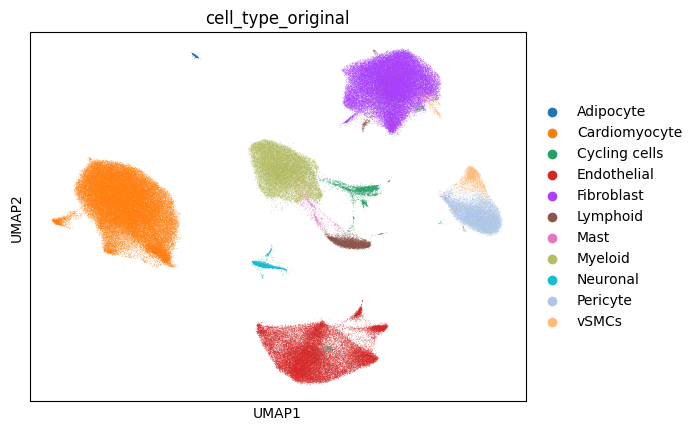

In [10]:
sc.pl.umap(adata, color=["cell_type_original"])

/home/j/joppich/tmp/ipykernel_49364/74842164.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['major_labl']).sum().plot(
/home/j/joppich/tmp/ipykernel_49364/74842164.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['major_labl']).sum().plot(
/home/j/joppich/tmp/ipykernel_49364/74842164.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['major_labl']).sum().plot(
/home/j/jo

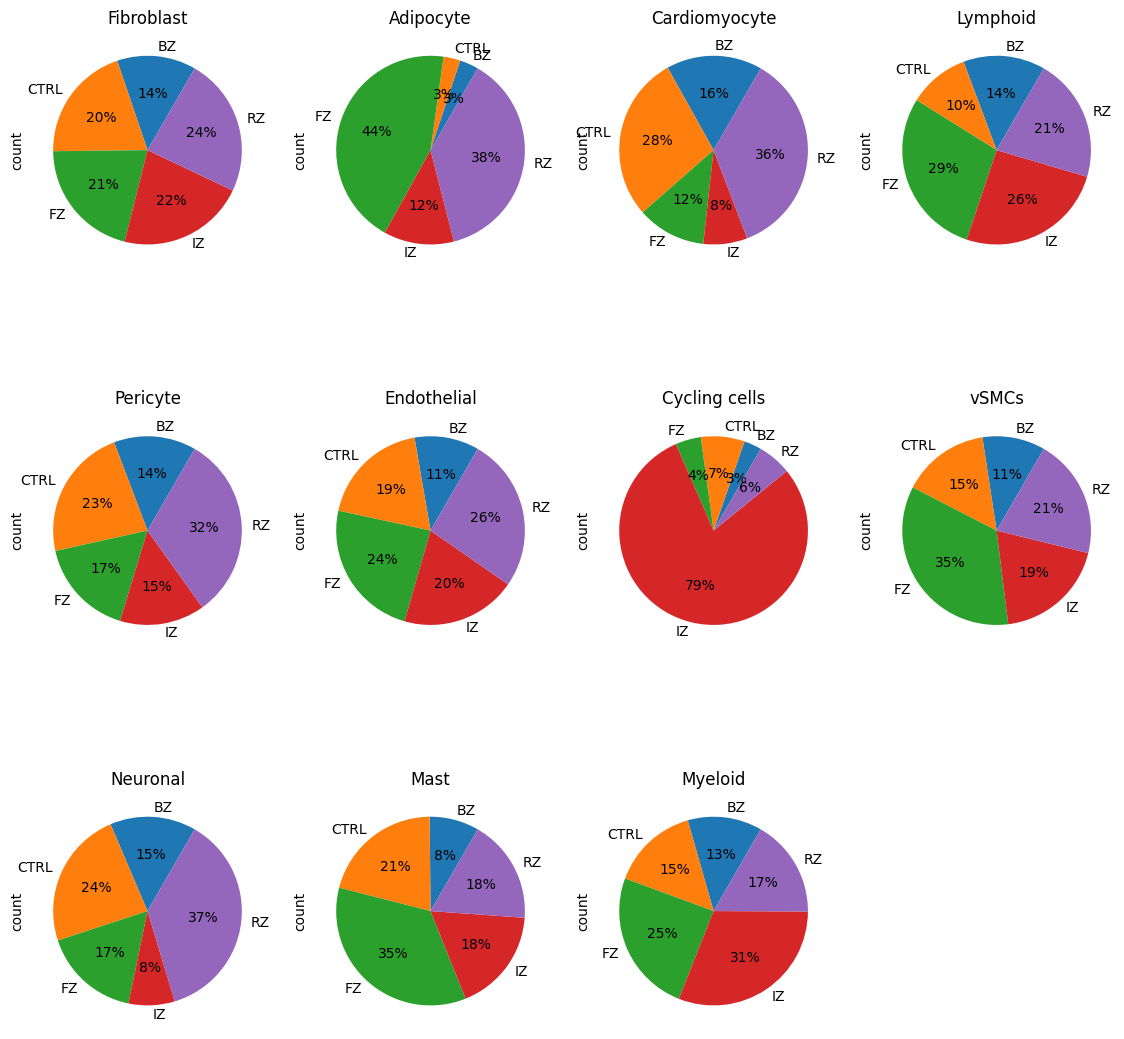

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 4, figsize=(14, 14))
faxs = axs.flatten()

df_labels = adata.obs.loc[:,("cell_type_original", "major_labl")]
df_labels["count"] = 1

for gi, group in enumerate(set(df_labels["cell_type_original"])):
    gdf = df_labels[df_labels["cell_type_original"] == group]
    
    gdf.groupby(['major_labl']).sum().plot( 
    kind='pie', y='count', autopct='%1.0f%%', startangle=60, ax=faxs[gi]) 
    faxs[gi].set_title(group)
    faxs[gi].get_legend().remove()
    
faxs[gi+1].set_visible(False)


In [12]:
myeloid_adata = adata[adata.obs.cell_type_original == "Myeloid"]
myeloid_adata.write("myeloid_human_mi.h5ad")

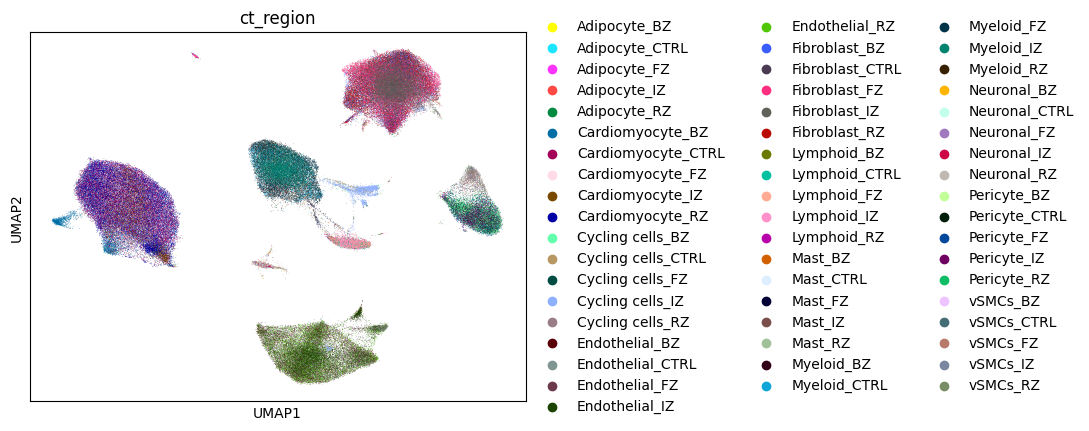

In [13]:
sc.pl.umap(adata, color=["ct_region"])

In [14]:
index2cellname = {i: x for i,x in enumerate(adata.obs.index)}
col2genename = {i: x for i,x in enumerate(adata.var.index)}
cellname2group = {cn: cg for cn, cg in zip(adata.obs.index, adata.obs["ct_region"])}

group2cellcount = Counter()
for cn in cellname2group:
    group2cellcount[cellname2group[cn]] += 1

In [15]:
group2cellcount

Counter({'Fibroblast_CTRL': 9452,
         'Cardiomyocyte_CTRL': 18310,
         'Endothelial_CTRL': 6175,
         'Myeloid_CTRL': 3155,
         'Neuronal_CTRL': 576,
         'Pericyte_CTRL': 2669,
         'Mast_CTRL': 150,
         'Lymphoid_CTRL': 527,
         'Cycling cells_CTRL': 223,
         'vSMCs_CTRL': 411,
         'Adipocyte_CTRL': 15,
         'Cardiomyocyte_FZ': 7599,
         'Endothelial_FZ': 7824,
         'Fibroblast_FZ': 9890,
         'Myeloid_FZ': 5190,
         'vSMCs_FZ': 945,
         'Neuronal_FZ': 407,
         'Pericyte_FZ': 1978,
         'Lymphoid_FZ': 1456,
         'Cycling cells_FZ': 130,
         'Adipocyte_FZ': 231,
         'Mast_FZ': 252,
         'Cardiomyocyte_BZ': 10594,
         'Fibroblast_BZ': 6406,
         'Cycling cells_BZ': 90,
         'Myeloid_BZ': 2689,
         'Endothelial_BZ': 3613,
         'Pericyte_BZ': 1656,
         'Neuronal_BZ': 359,
         'Lymphoid_BZ': 711,
         'Adipocyte_BZ': 17,
         'vSMCs_BZ': 294,
       

In [16]:

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def sd():
    def sd_(x):
        return np.std(x)
    sd_.__name__ = "sd"
    return sd_

def enum():
    def enum_(x):
        return x.size
    enum_.__name__ = 'num'
    return enum_



In [17]:
coo = adata.X.tocoo(copy=False)
genedf = pd.DataFrame({'rowidx': coo.row, 'col': coo.col, 'data': coo.data})[['rowidx', 'col', 'data']]

In [18]:
genedf["cellname"] = genedf.rowidx.map(index2cellname)
genedf["gene"] = genedf.col.map(col2genename)
genedf["group"] = genedf.cellname.map(cellname2group)
genedf

,rowidx,col,data,cellname,gene,group
0,667,0,0.429158,ACAGAAAGTTCGATTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,AL627309.1,Cardiomyocyte_CTRL
1,1135,0,0.746513,ACTGTCCTCGTGGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,AL627309.1,Cardiomyocyte_CTRL
2,1523,0,1.793428,AGCGCTGTCATTTGCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,AL627309.1,Myeloid_CTRL
3,1664,0,1.844032,AGGCATTTCCTAGCGG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,AL627309.1,Fibroblast_CTRL
4,1979,0,2.506445,AGTGCCGGTTCTAAGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,AL627309.1,Endothelial_CTRL
...,...,...,...,...,...,...
387530094,190919,29125,2.406118,CAGTTCCGTCTTACAG-1,KRT79,Myeloid_IZ
387530095,190980,29125,2.905324,CCGCAAGGTGTTAGCT-1,KRT79,Fibroblast_IZ
387530096,191274,29125,2.842295,GCAGGCTGTACGCTTA-1,KRT79,Fibroblast_IZ
387530097,191733,29125,2.849934,TTCATGTGTTATCTGG-1,KRT79,Endothelial_IZ


In [19]:
genedf2 = genedf[genedf.gene == "ALB"]

In [20]:
genedf2

,rowidx,col,data,cellname,gene,group
101068277,2394,6138,1.562203,ATGCATGGTTGCTCAA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068278,3741,6138,1.381439,CCCTAACCACATACTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068279,4830,6138,1.456416,CTCACTGGTCAAAGTA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Myeloid_CTRL
101068280,5585,6138,1.520384,GAATCACCATTACTCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068281,8041,6138,2.061623,GTTGCGGAGACCGCCT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068282,8973,6138,1.418014,TCAGTTTCAATCGCAT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068283,9267,6138,1.376328,TCCGGGACAACCGACC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_CTRL
101068284,30600,6138,2.737665,ACGTAGTGTTAGGAGC-1_2_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Cardiomyocyte_IZ
101068285,30731,6138,2.807975,CAGAGCCTCCACGGAC-1_2_1_1_1_1_1_1_1_1_1_1_1_1,ALB,Fibroblast_IZ


In [21]:
aggdf = genedf.groupby(["group", "gene"])["data"].aggregate(["min", percentile(25), np.median, percentile(75), "max", "mean", enum(), sd()])
aggdf


min  percentile_25    median  percentile_75   
group        gene                                                          
Adipocyte_BZ A1BG       1.106677       1.106677  1.106677       1.106677  \
             A2M        0.549252       0.819767  1.090282       1.541068   
             A2ML1      0.549252       0.549252  0.549252       0.549252   
             A2ML1-AS1  2.272458       2.272458  2.272458       2.272458   
             A4GALT     0.602372       0.602372  0.602372       0.602372   
...                          ...            ...       ...            ...   
vSMCs_RZ     ZXDC       0.865454       1.346871  1.571353       1.881319   
             ZYG11A     1.778958       1.778958  1.778958       1.778958   
             ZYG11B     0.865454       1.418913  1.618459       1.830971   
             ZYX        1.076957       1.330973  1.534644       1.672039   
             ZZEF1      0.865454       1.367559  1.603385       1.936545   

                             max      mean  num        sd  
group        gene                                          
Adipocyte_BZ A1BG       1.106677  1.106677    1  0.000000  
             A2M        1.991855  1.210463    3  0.595040  
             A2ML1      0.549252  0.549252    1  0.000000  
             A2ML1-AS1  2.272458  2.272458    1  0.000000  
             A4GALT     0.602372  0.602372    1  0.000000  
...                          ...       ...  ...       ...  
vSMCs_RZ     ZXDC       2.828707  1.642562  107  0.398242  
             ZYG11A     1.778958  1.778958    1  0.000000  
             ZYG11B     2.619047  1.641111  107  0.384034  
             ZYX        2.541819  1.545073   40  0.277861  
             ZZEF1      2.905324  1.668683  147  0.394147  

[1147318 rows x 8 columns]

In [22]:
aggdf["group_cells"] = aggdf.index.get_level_values(0).map(group2cellcount)
aggdf["perc_expr"] = aggdf.num / aggdf.group_cells
aggdf


min  percentile_25    median  percentile_75   
group        gene                                                          
Adipocyte_BZ A1BG       1.106677       1.106677  1.106677       1.106677  \
             A2M        0.549252       0.819767  1.090282       1.541068   
             A2ML1      0.549252       0.549252  0.549252       0.549252   
             A2ML1-AS1  2.272458       2.272458  2.272458       2.272458   
             A4GALT     0.602372       0.602372  0.602372       0.602372   
...                          ...            ...       ...            ...   
vSMCs_RZ     ZXDC       0.865454       1.346871  1.571353       1.881319   
             ZYG11A     1.778958       1.778958  1.778958       1.778958   
             ZYG11B     0.865454       1.418913  1.618459       1.830971   
             ZYX        1.076957       1.330973  1.534644       1.672039   
             ZZEF1      0.865454       1.367559  1.603385       1.936545   

                             max      mean  num        sd  group_cells   
group        gene                                                        
Adipocyte_BZ A1BG       1.106677  1.106677    1  0.000000           17  \
             A2M        1.991855  1.210463    3  0.595040           17   
             A2ML1      0.549252  0.549252    1  0.000000           17   
             A2ML1-AS1  2.272458  2.272458    1  0.000000           17   
             A4GALT     0.602372  0.602372    1  0.000000           17   
...                          ...       ...  ...       ...          ...   
vSMCs_RZ     ZXDC       2.828707  1.642562  107  0.398242          561   
             ZYG11A     1.778958  1.778958    1  0.000000          561   
             ZYG11B     2.619047  1.641111  107  0.384034          561   
             ZYX        2.541819  1.545073   40  0.277861          561   
             ZZEF1      2.905324  1.668683  147  0.394147          561   

                        perc_expr  
group        gene                  
Adipocyte_BZ A1BG        0.058824  
             A2M         0.176471  
             A2ML1       0.058824  
             A2ML1-AS1   0.058824  
             A4GALT      0.058824  
...                           ...  
vSMCs_RZ     ZXDC        0.190731  
             ZYG11A      0.001783  
             ZYG11B      0.190731  
             ZYX         0.071301  
             ZZEF1       0.262032  

[1147318 rows x 10 columns]

In [23]:
aggdf.to_csv("expression_ctzone_mean_df.tsv", sep="\t")